In [21]:
# Read Fashion MNIST dataset
import numpy as numpy
import util_mnist_reader



from sklearn.metrics import confusion_matrix
import matplotlib 
import matplotlib.pyplot as plt

 


X_train1, y_train = util_mnist_reader.load_mnist('C:\\Users\\thush\\Downloads\\Introduction to Machine Learning\\Project 2\\data\\fashion', kind='train')
X_test1, y_test = util_mnist_reader.load_mnist('C:\\Users\\thush\\Downloads\\Introduction to Machine Learning\\Project 2\\data\\fashion', kind='t10k')
# Your code goes here . . .
print(X_train1[0])
print(X_train1.shape[0],X_train1.shape[1])

# Your code goes here . . .
#X_train shape is 60,000 x 784 and y_train is 60,000 x 1
#X_test shape is 10,000 X 784 and y_train is 10,000 x 1

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0
   0   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   3   0
  36 136 127  62  54   0   0   0   1   3   4   0   0   3   0   0   0   0
   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0
   0   0   0  12  10   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15   0   0
   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163
 127 121 122 146 141  88 172  66   0   0   0   0   0   0   0   0   0   1
   1   1   0 200 232 232 233 229 223 223 215 213 16

In [23]:


hidden_nodes=128

w1=numpy.sqrt(2/X_train1.shape[0]) * numpy.random.rand(784,hidden_nodes)
w2=numpy.sqrt(2/X_train1.shape[0]) * numpy.random.rand(hidden_nodes,10)
b1=numpy.zeros((hidden_nodes)) 
b2=numpy.zeros((10)) 
learning_rate=0.1          
print("b1 ",b1.shape)

b1  (128,)


In [24]:


X_train=X_train1/255.0
X_test=X_test1/255.0
Y_train=y_train
Y_test=y_test
m=len(X_train) #number of rows from data

#calculating one hot vector for the loss numpy.multiply to work
label=numpy.zeros((60000,10))
for i in range(60000):
    label[i,y_train[i]]=1
Y1_train=label





In [25]:
# Using sigmoid function for Hidden layer activation 
def sigmoid(z):
    return 1/(1+numpy.exp(-(z))) 

def relu(x):
    return numpy.maximum(0, x)

In [26]:

def softmax(z):
    e=numpy.exp(z - numpy.max(z, axis = 1, keepdims=True))
    return e/numpy.sum(e, axis = 1, keepdims=True)


In [27]:
def predict(X, w1, w2, b1, b2):
    z1=numpy.dot(X,w1)+b1           
    a_hidden = relu(z1)
    z2=numpy.dot(a_hidden,w2)+b2                
    a_output= softmax(z2)
    return numpy.argmax(a_output, axis = 1)

In [28]:
cost=[]
for epoch in range(1000):

    z1=numpy.dot(X_train,w1)+b1            
    a_hidden = relu(z1)

    z2=numpy.dot(a_hidden,w2)+b2                
    a_output= softmax(z2)
    
    log_likelihood = -numpy.log(a_output[range(X_train.shape[0]), Y_train])
    loss = numpy.sum(log_likelihood)/X_train.shape[0]

    print("Loss: ", loss)    
    cost.append(loss)
    
      
    a_output[range(X_train.shape[0]), Y_train] -= 1

    a_output /= X_train.shape[0]
  
    delta_w2=numpy.dot(a_hidden.T, a_output)

    

    wd1=numpy.dot(a_output,w2.T) 
    wd1[a_hidden<=0] = 0
    delta_w1=numpy.dot(X_train.T,wd1) 
    
    
    w1=w1-numpy.multiply(learning_rate,delta_w1)
    w2=w2-numpy.multiply(learning_rate,delta_w2)

    delta_b1=numpy.sum(wd1)
    delta_b2=numpy.sum(a_output)

    b1=b1-numpy.multiply(learning_rate,delta_b1)
    b2=b2-numpy.multiply(learning_rate,delta_b2)

Loss:  2.3039724865431075
Loss:  2.2719388331180848
Loss:  2.265861216257904
Loss:  2.263335438171631
Loss:  2.2614169726176527
Loss:  2.259541154768596
Loss:  2.2575517895144914
Loss:  2.255382820195385
Loss:  2.252989187141536
Loss:  2.2503282516107137
Loss:  2.2473544561848424
Loss:  2.244021460566111
Loss:  2.2402945467997415
Loss:  2.2361735922500983
Loss:  2.2316869399640593
Loss:  2.226855333751633
Loss:  2.2216826954731412
Loss:  2.2161970789402803
Loss:  2.210470085397697
Loss:  2.204606348600243
Loss:  2.1987221387790066
Loss:  2.192902178506164
Loss:  2.187176855362378
Loss:  2.18152807544347
Loss:  2.175912448571444
Loss:  2.1702769818513987
Loss:  2.1645596245146916
Loss:  2.1586934094505157
Loss:  2.1526085960289767
Loss:  2.1462282918023785
Loss:  2.139476183421934
Loss:  2.1322692986764062
Loss:  2.1245193721981934
Loss:  2.116132361271281
Loss:  2.1070097341850436
Loss:  2.0970461254259516
Loss:  2.08613453008888
Loss:  2.0741698365861074
Loss:  2.061049197768806
Loss:

Loss:  0.7189534183157804
Loss:  0.7148867592656477
Loss:  0.7173105224662496
Loss:  0.7132701891969987
Loss:  0.7156772099569169
Loss:  0.7116606161406855
Loss:  0.7140505169904279
Loss:  0.7100622282469663
Loss:  0.7124348972785066
Loss:  0.70847529059412
Loss:  0.7108320391976198
Loss:  0.7068997351132387
Loss:  0.7092426589183255
Loss:  0.7053365965881245
Loss:  0.7076614368082124
Loss:  0.7037818125579847
Loss:  0.706093622478325
Loss:  0.7022388776561367
Loss:  0.704536374200519
Loss:  0.7007033473101263
Loss:  0.7029861234770134
Loss:  0.6991761728309547
Loss:  0.7014461674100382
Loss:  0.6976616815864747
Loss:  0.6999166969831919
Loss:  0.6961587606528925
Loss:  0.6984006897884139
Loss:  0.6946639610121854
Loss:  0.6968958077969962
Loss:  0.6931798955390829
Loss:  0.6953986772994701
Loss:  0.6917070804357676
Loss:  0.6939125282015592
Loss:  0.6902451355240861
Loss:  0.6924398504479873
Loss:  0.6887944948263396
Loss:  0.6909807597356562
Loss:  0.6873563319001981
Loss:  0.6895293

Loss:  0.5566468023622967
Loss:  0.5564852493652651
Loss:  0.5560318454181988
Loss:  0.5556629806089288
Loss:  0.5554520466241213
Loss:  0.5548681433386972
Loss:  0.5549015717851771
Loss:  0.5540956648594116
Loss:  0.5543747939859622
Loss:  0.5533401645899104
Loss:  0.5538681382866879
Loss:  0.5526005172550368
Loss:  0.5533822787968388
Loss:  0.5518755714047253
Loss:  0.5529162853834843
Loss:  0.5511588857990317
Loss:  0.5524619678517149
Loss:  0.5504507708178269
Loss:  0.552020067073363
Loss:  0.5497499159664235
Loss:  0.5515909944349644
Loss:  0.5490573594096829
Loss:  0.5511701082958768
Loss:  0.5483737381811487
Loss:  0.5507611009283689
Loss:  0.5477004507737506
Loss:  0.5503617590947966
Loss:  0.5470362622118137
Loss:  0.5499712771883085
Loss:  0.5463841372954705
Loss:  0.5495878189131963
Loss:  0.5457425110349894
Loss:  0.5492156018965496
Loss:  0.5451113223792518
Loss:  0.5488472157616229
Loss:  0.5444879416920438
Loss:  0.5484790075096706
Loss:  0.5438784768865962
Loss:  0.5481

Loss:  0.49886997785419657
Loss:  0.49947882290257706
Loss:  0.4979569189636677
Loss:  0.4984257409084433
Loss:  0.49712815482586803
Loss:  0.49744638615390807
Loss:  0.49639501481091786
Loss:  0.49655157233770914
Loss:  0.4957516417713353
Loss:  0.49573756649458833
Loss:  0.4951974297779564
Loss:  0.49499948650736547
Loss:  0.4947261599483396
Loss:  0.49433229283436075
Loss:  0.4943301648764796
Loss:  0.4937282194736894
Loss:  0.494005873222026
Loss:  0.49318253220336594
Loss:  0.4937525677826476
Loss:  0.49268891252598607
Loss:  0.4935500870081021
Loss:  0.49222975927699897
Loss:  0.4933965665258948
Loss:  0.49180699264323957
Loss:  0.4932827023294027
Loss:  0.4914108192853658
Loss:  0.49320350032101407
Loss:  0.49103759329841734
Loss:  0.4931450160123143
Loss:  0.4906828933550999
Loss:  0.49310762021250953
Loss:  0.4903456571202415
Loss:  0.49308077675519546
Loss:  0.49001871807700204
Loss:  0.49306322918699164
Loss:  0.4897081106808413
Loss:  0.49305062078595396
Loss:  0.4894067772

In [34]:
(predict(X_test, w1, w2, b1, b2)==y_test).mean()*100
y_predict=(predict(X_test, w1, w2, b1, b2))

In [60]:
print(a2.shape)

(60000, 10)


Text(0, 0.5, 'Cost')

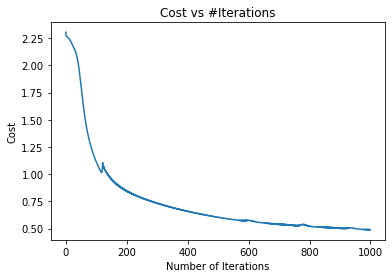

In [29]:
import matplotlib.pyplot as plt
plt.plot(cost)

#plt.plot(cost_validation)

plt.title("Cost vs #Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")

In [37]:
a_hidden.shape

(60000, 128)

In [36]:

from sklearn.metrics import confusion_matrix
confusion=confusion_matrix(y_test,y_predict)
print(confusion)


[[823   7  31  61  12   0  48   0  18   0]
 [  2 950  11  27   8   0   1   0   1   0]
 [ 21   6 764  10 165   1  22   0  11   0]
 [ 31  15  19 856  50   1  24   0   4   0]
 [  0   2 127  35 796   0  32   0   8   0]
 [  1   0   0   1   0 865   0  66   7  60]
 [197   4 192  53 211   0 311   0  32   0]
 [  0   0   0   0   0  28   0 921   0  51]
 [  4   1  16  10   7   6  12   7 937   0]
 [  0   0   0   0   0  12   0  47   1 940]]


In [7]:
!pip install sklearn

In [6]:
!pip install --upgrade pip


  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\AppData\\Local\\Temp\\pip-uninstall-1rc6cpyj\\pip.exe'
Consider using the `--user` option or check the permissions.



In [19]:
!pip install -U scikit-learn

  Found existing installation: scikit-learn 0.19.2
    Uninstalling scikit-learn-0.19.2:
      Successfully uninstalled scikit-learn-0.19.2


In [39]:
(predict(X_test, w1, w2, b1, b2)==y_test).mean()*100

81.63